In [194]:
# Data wrangling
import pandas as pd
import numpy as np

# Feature encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Load in the data:**

In [91]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
example = pd.read_csv('gender_submission.csv')

## 1. Data Overview

In [92]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [93]:
print(train.shape, "---", train.shape[0], "rows and", train.shape[1],"columns.")

(891, 12) --- 891 rows and 12 columns.


**Object datatype usually represents a string.**

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [96]:
print(test.shape, "---", test.shape[0], "rows and", test.shape[1],"columns.")

(418, 11) --- 418 rows and 11 columns.


**Survived column is missing from the test dataset, because that's the variable we want to predict.**

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data description

![title](pics/data.png)

### Data notes

![title](pics/notes.png)

**Example of how the submission csv file should look like:**

In [98]:
example.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## 2. Exploratory Data Analysis

### Missing values

In [99]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [100]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [101]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [102]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

## 3. Feature analysis
### Categorical variable - Sex
**There were more male passengers on the ship.**

In [103]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [104]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Sex  Survived
0  female  0.742038
1    male  0.188908

**Female passengers were more likely to survive.**

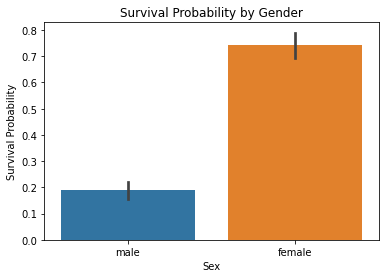

In [105]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')
plt.show()

### Categorical variable - Pclass

In [106]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Most passengers were in the upper class - those that had better socio-economic status.**

In [107]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

**Survival probability is highest among passengers from the upper class.**

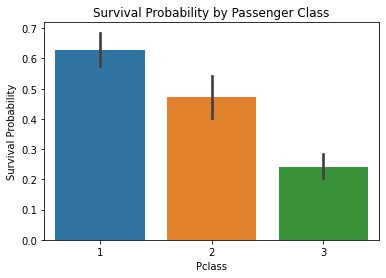

In [108]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
plt.show()

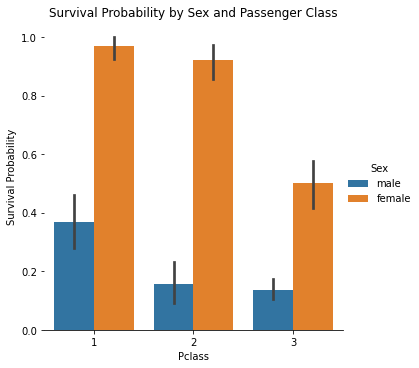

In [109]:
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')
plt.show()

**Female passengers had better chance of survival in every of the passenger classes, as we can see on the plot above.**

### Categorical variable - Embarked

In [110]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

**Most passengers embarked in Southampton.**

In [111]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

**Passengers that embarked in Cherbourg had the best chance of survival. This could be because passengers that embarked in Cherbourg were mostly upper class passengers. We are going to test that hypothesis.**

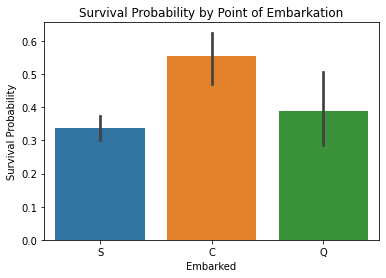

In [112]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')
plt.show()

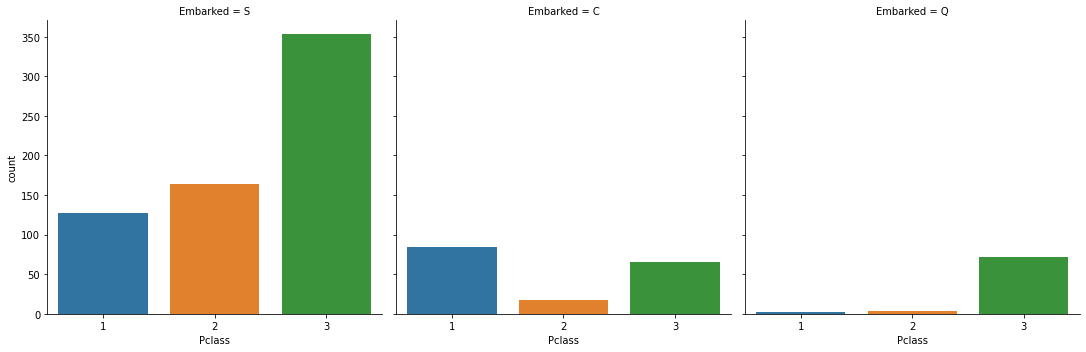

In [113]:
sns.catplot('Pclass', col = 'Embarked', data = train, kind = 'count')
plt.show()

**We can see that passengers who embarked in Southampton and Queenstown were dominantly lower class passengers, while those that embarked in Cherbourg were dominantly first class passenger. This seems to be the reason that passengers who embarked in Cherbourg had highest chance of survival.**

### Numerical variables - correlation with survival

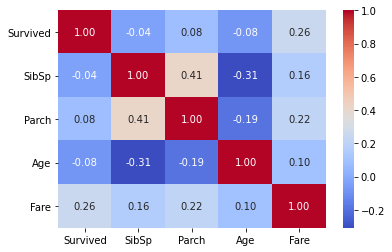

In [114]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

**Fares have the highest correlation with survival, meaning that the price passengers paid for the ticket has potentially had some effect on their survival probability.**

### Numerical variable - SibSp

In [115]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [116]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

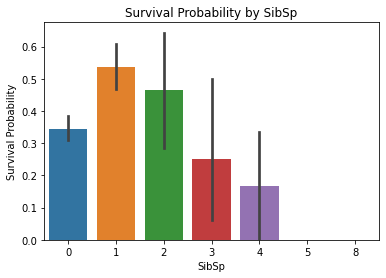

In [117]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')
plt.show()

### Numerical variable - Parch

In [118]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [119]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

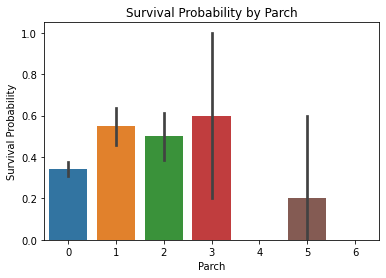

In [120]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
plt.show()

### Numerical variable - Age


**177 values are missing in the age column. We are going to deal with missing values later.**

In [121]:
train['Age'].isnull().sum()

177

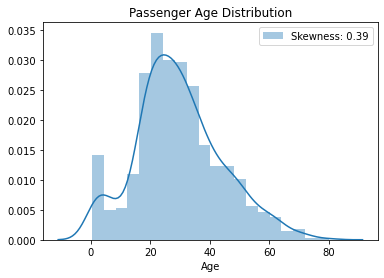

In [122]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')
plt.show()

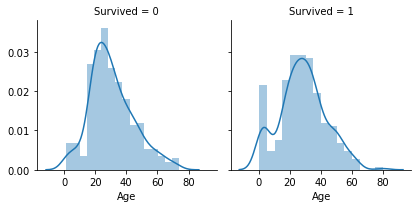

In [123]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')
plt.show()

**We can see the slight lift in the age distribution of the passengers that survived the accident. That is because children were likely prioritized in evacuation so more of them survived the accident.**

**The mentioned difference in the two distributions is more noticeable on the kde plot below.**

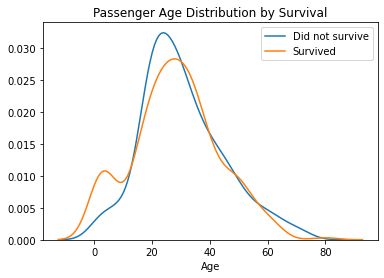

In [124]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.show()

### Numerical variable - Fare

In [125]:
train['Fare'].isnull().sum()

0

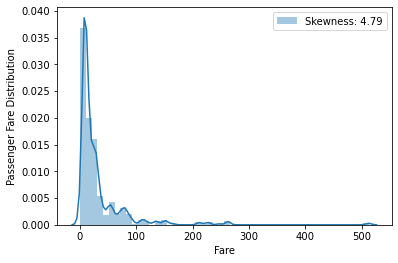

In [126]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')
plt.show()

**Fare distribution is highly skewed. We will address this issue in the data preprocessing part.**

## 4. Data Preprocessing
**Data preprocessing step consists of filling the missing values, data transformation, feature engineering and feature encoding. I'm going to drop *Ticket* and *Cabin* columns for the purpose of this particular submission.**

In [127]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [128]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

**We could either drop the two rows that are missing in the *Embarked* column values, or we can impute the missing values. One way to impute the missing values is to replace them with the most frequent value in that column - mode.**

In [129]:
mode = train['Embarked'].dropna().mode()
train['Embarked'].fillna(mode, inplace = True)

In [130]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

**I'm going to replace one missing value in the *Fare* column with the median value from the same column.**

In [131]:
median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace = True)

**Since I'm going to transform existing columns and create new ones, it's important to combine training and testing dataset into a single dataset before that. That way we can apply same transformations to both datasets easily which is important when we get to the prediction later.**

In [132]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S

In [133]:
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

**Let's convert the *Sex* feature values into numerical values where 0 = male and 1 = female. This process is known as encoding.**

In [134]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

**Missing values in the *Survived* column are all from the testing set, so we can safely ignore them. Let's analyse the *Age* column and how it correlates to other variables.**

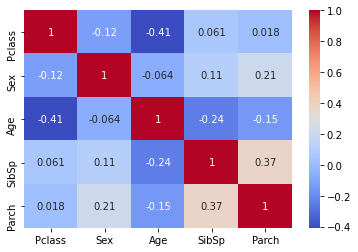

In [135]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')
plt.show()

***Age* has medium negative correlation with *Pclass* as well as weak negative correlation with *SibSp* and *Parch* features.**

In [136]:
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

263

**The idea is to loop through the missing age indices and locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.**

In [137]:
median_age = combine['Age'].median()
for index in age_nan_indices:
    predict_age = combine['Age'].loc[(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine.at[index,'Age'] = median_age
    else:
        combine.at[index,'Age'] = predict_age

In [138]:
combine['Age'].isnull().sum()

0

### Data transformation

**In our analysis of the *Fare* feature, we had noticed that its distribution was highly skewed. In order to make this column ready for modelling, we need it to resemble somewhat of a normal distribution. To achieve that, we will apply log transformation.**

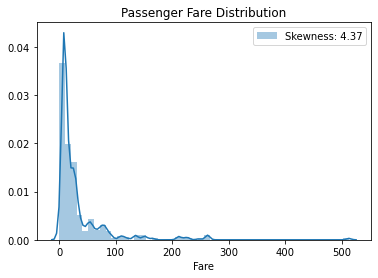

In [139]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')
plt.show()

In [140]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

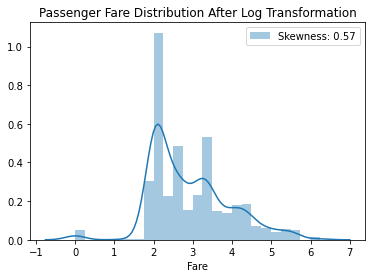

In [141]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')
plt.show()

## 5. Feature Engineering
**This is arguably the most important step so far. It is the process of creating new features from existing ones in order to better represent an underlying problem predictive model is going to solve.**

In [142]:
combine.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

       Fare Embarked  
0  1.981001        S  
1  4.266662        C  
2  2.070022        S  
3  3.972177        S  
4  2.085672        S

**I'm now going to extract the title from the *Name* column.**

In [143]:
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr

In [144]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Jonkheer          1
Mme               1
the Countess      1
Lady              1
Capt              1
Dona              1
Don               1
Sir               1
Name: Title, dtype: int64

**Since there are many titles appearing only a few times, it'd be a good idea to simplify the *Title* column even further.**

In [145]:
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

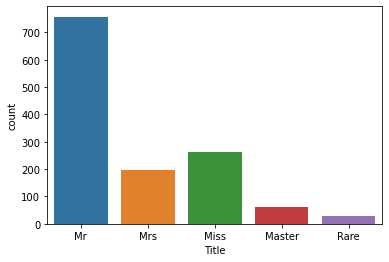

In [146]:
sns.countplot(combine['Title'])
plt.show()

In [147]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Title  Survived
3     Mrs  0.793651
1    Miss  0.702703
0  Master  0.575000
4    Rare  0.347826
2      Mr  0.156673

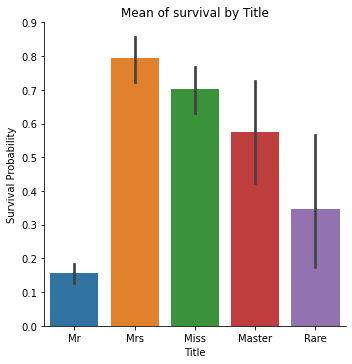

In [148]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')
plt.show()

**We can now safely drop the *Name* column.**

In [149]:
combine = combine.drop('Name', axis = 1)
combine.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  \
0            1       0.0       3    0  22.0      1      0  1.981001        S   
1            2       1.0       1    1  38.0      1      0  4.266662        C   
2            3       1.0       3    1  26.0      0      0  2.070022        S   
3            4       1.0       1    1  35.0      1      0  3.972177        S   
4            5       0.0       3    0  35.0      0      0  2.085672        S   

  Title  
0    Mr  
1   Mrs  
2  Miss  
3   Mrs  
4    Mr

**By having *SibSp* and *Parch* columns, we can easily calculate the family size of a passenger.**

In [150]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2

In [151]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [152]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [153]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

IsAlone  Survived
0        0  0.505650
1        1  0.303538

**We can now drop the *SibSp*, *Parch* and a newly created *FamilySize* column becuase we used them to create a new *IsAlone* column.**

In [154]:
combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

PassengerId  Survived  Pclass  Sex   Age      Fare Embarked Title  IsAlone
0            1       0.0       3    0  22.0  1.981001        S    Mr        0
1            2       1.0       1    1  38.0  4.266662        C   Mrs        0
2            3       1.0       3    1  26.0  2.070022        S  Miss        1
3            4       1.0       1    1  35.0  3.972177        S   Mrs        0
4            5       0.0       3    0  35.0  2.085672        S    Mr        1

In [155]:
combine['AgeInterval'] = pd.cut(combine['Age'], 5)
combine[['AgeInterval', 'Survived']].groupby('AgeInterval', as_index=False).mean().sort_values(by = 'AgeInterval')

AgeInterval  Survived
0  (0.0902, 16.136]  0.500000
1  (16.136, 32.102]  0.341719
2  (32.102, 48.068]  0.412844
3  (48.068, 64.034]  0.434783
4    (64.034, 80.0]  0.090909

**Now I'll assign ordinal values for every age interval.**

In [156]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

***Age Interval* column has served its purpose so it's safe to drop it.**

In [157]:
combine = combine.drop('AgeInterval', axis = 1)

In [158]:
combine['Age'].dtype

dtype('float64')

**We have to convert the *Age* column to an integer datatype.**

In [159]:
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

### Feature encoding

In [160]:
combine.head()

PassengerId  Survived  Pclass  Sex  Age      Fare Embarked Title  IsAlone
0            1       0.0       3    0    1  1.981001        S    Mr        0
1            2       1.0       1    1    2  4.266662        C   Mrs        0
2            3       1.0       3    1    1  2.070022        S  Miss        1
3            4       1.0       1    1    2  3.972177        S   Mrs        0
4            5       0.0       3    0    2  2.085672        S    Mr        1

**Let's encode *Title* and *Embarked* features.**

In [161]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

**When we joined our datasets into one, two new missing values appeared in the *Embarked* column. I'll fill them with a mode value.**

In [170]:
em_mode = combine['Embarked'].dropna().mode()[0]
em_mode

'S'

In [171]:
combine['Embarked'].fillna(em_mode, inplace = True)

**I'm going to use One Hot Encoder from scikitlearn library to encode categorical columns *Embarked* and *Title*.**

In [173]:
cols = ['Title','Embarked']
ohe_cols = pd.DataFrame(ohe.fit_transform(combine[cols]))
ohe_cols.index = combine.index
combine = pd.concat([combine, ohe_cols], axis=1)

**It's safe to drop the columns we just encoded.**

In [175]:
combine = combine.drop(cols, axis=1)

In [176]:
combine.head()

PassengerId  Survived  Pclass  Sex  Age      Fare  IsAlone    0    1    2  \
0            1       0.0       3    0    1  1.981001        0  0.0  0.0  1.0   
1            2       1.0       1    1    2  4.266662        0  0.0  0.0  0.0   
2            3       1.0       3    1    1  2.070022        1  0.0  1.0  0.0   
3            4       1.0       1    1    2  3.972177        0  0.0  0.0  0.0   
4            5       0.0       3    0    2  2.085672        1  0.0  0.0  1.0   

     3    4    5    6    7  
0  0.0  0.0  0.0  0.0  1.0  
1  1.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  
3  1.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  1.0

**I'll divide the *Fare* column into intervals and then assign ordinal values to each interval.**

In [177]:
combine['FareInterval'] = pd.cut(combine['Fare'], 4)
combine[['FareInterval', 'Survived']].groupby(['FareInterval'], as_index=False).mean().sort_values(by = 'FareInterval')

FareInterval  Survived
0  (-0.00624, 1.56]  0.062500
1     (1.56, 3.119]  0.288719
2    (3.119, 4.679]  0.504983
3    (4.679, 6.239]  0.745098

In [178]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [179]:
combine['Fare'] = combine['Fare'].astype('int')

In [180]:
combine = combine.drop('FareInterval', axis = 1)

In [181]:
combine.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  IsAlone    0    1    2    3  \
0            1       0.0       3    0    1     1        0  0.0  0.0  1.0  0.0   
1            2       1.0       1    1    2     2        0  0.0  0.0  0.0  1.0   
2            3       1.0       3    1    1     1        1  0.0  1.0  0.0  0.0   
3            4       1.0       1    1    2     2        0  0.0  0.0  0.0  1.0   
4            5       0.0       3    0    2     1        1  0.0  0.0  1.0  0.0   

     4    5    6    7  
0  0.0  0.0  0.0  1.0  
1  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0

**Since we are done with modifying the combined dataset, wee can now revert back to our training and testing set. Let's first convert 0-7 columns to integers.**

In [184]:
to_int_cols = [0,1,2,3,4,5,6,7]
for col in to_int_cols:
    combine[col] = combine[col].astype('int')

In [185]:
combine.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  \
0            1       0.0       3    0    1     1        0  0  0  1  0  0  0   
1            2       1.0       1    1    2     2        0  0  0  0  1  0  1   
2            3       1.0       3    1    1     1        1  0  1  0  0  0  0   
3            4       1.0       1    1    2     2        0  0  0  0  1  0  0   
4            5       0.0       3    0    2     1        1  0  0  1  0  0  0   

   6  7  
0  0  1  
1  0  0  
2  0  1  
3  0  1  
4  0  1

In [186]:
train = combine[:len(train)]
test = combine[len(train):]

In [187]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  \
0            1       0.0       3    0    1     1        0  0  0  1  0  0  0   
1            2       1.0       1    1    2     2        0  0  0  0  1  0  1   
2            3       1.0       3    1    1     1        1  0  1  0  0  0  0   
3            4       1.0       1    1    2     2        0  0  0  0  1  0  0   
4            5       0.0       3    0    2     1        1  0  0  1  0  0  0   

   6  7  
0  0  1  
1  0  0  
2  0  1  
3  0  1  
4  0  1

**PassengerId is of no use to us, we can drop it.**

In [188]:
train = train.drop('PassengerId', axis = 1)
train.head()

Survived  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  6  7
0       0.0       3    0    1     1        0  0  0  1  0  0  0  0  1
1       1.0       1    1    2     2        0  0  0  0  1  0  1  0  0
2       1.0       3    1    1     1        1  0  1  0  0  0  0  0  1
3       1.0       1    1    2     2        0  0  0  0  1  0  0  0  1
4       0.0       3    0    2     1        1  0  0  1  0  0  0  0  1

**Converting *Survived* column to integer datatype.**

In [189]:
train['Survived'] = train['Survived'].astype('int')
train.head()

Survived  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  6  7
0         0       3    0    1     1        0  0  0  1  0  0  0  0  1
1         1       1    1    2     2        0  0  0  0  1  0  1  0  0
2         1       3    1    1     1        1  0  1  0  0  0  0  0  1
3         1       1    1    2     2        0  0  0  0  1  0  0  0  1
4         0       3    0    2     1        1  0  0  1  0  0  0  0  1

In [190]:
test.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  \
891          892       NaN       3    0    2     1        1  0  0  1  0  0  0   
892          893       NaN       3    1    2     1        0  0  0  0  1  0  0   
893          894       NaN       2    0    3     1        1  0  0  1  0  0  0   
894          895       NaN       3    0    1     1        1  0  0  1  0  0  0   
895          896       NaN       3    1    1     1        0  0  0  0  1  0  0   

     6  7  
891  1  0  
892  0  1  
893  1  0  
894  0  1  
895  0  1

**When we split the combined dataset back to two original datasets, we now have leftover *Survived* column values that we can safely drop.**

In [191]:
test = test.drop('Survived', axis = 1)
test.head()

PassengerId  Pclass  Sex  Age  Fare  IsAlone  0  1  2  3  4  5  6  7
891          892       3    0    2     1        1  0  0  1  0  0  0  1  0
892          893       3    1    2     1        0  0  0  0  1  0  0  0  1
893          894       2    0    3     1        1  0  0  1  0  0  0  1  0
894          895       3    0    1     1        1  0  0  1  0  0  0  0  1
895          896       3    1    1     1        0  0  0  0  1  0  0  0  1

## 6. Modelling

**Scikit-learn is a popular python library for machine learning and we are going to use it for this part of the project. Since predicting if a passenger has survived the accident is a classification problem, we will need to use classification models (classifiers).**

In [192]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 13)
Y_train shape:  (891,)
X_test shape:  (418, 13)


### Fit models to data and make predictions

**Logistic regression:**

In [195]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

**Support vector machines:**

In [196]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.61

**K-nearest neighbours (KNN):**

In [200]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

**Gaussian naive bayes:**

In [198]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.68

**Perceptron:**

In [199]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.12

**Linear SVC:**

In [201]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.36

**Stochastic gradient descent:**

In [202]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.66

**Decision tree:**

In [203]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.86

**Random forest:**

In [204]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.86

### Model evaluation

In [205]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

Model  Score
0               Random Forest  85.86
1               Decision Tree  85.86
2                         KNN  84.74
3     Support Vector Machines  83.61
4         Logistic Regression  82.15
5                  Linear SVC  80.36
6                  Perceptron  79.12
7                 Naive Bayes  78.68
8  Stochastic Gradient Decent  76.66

### K-fold cross validation

**This method involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds.
Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times. The results of a k-fold cross-validation run are often summarized with the mean of the model skill scores. It is also good practice to include a measure of the variance of the skill scores, such as the standard deviation or standard error.**

In [208]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

In [209]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

In [210]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [211]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

Cross Validation Mean  Cross Validation Std                    Algorithm
0               0.826042              0.031047      Support Vector Machines
1               0.813720              0.022869          Logistic Regression
2               0.810387              0.032654                Random Forest
3               0.804931              0.073580                          KNN
4               0.799126              0.024620                   Linear SVC
5               0.792409              0.027256                Decision Tree
6               0.782285              0.039518          Gausian Naive Bayes
7               0.757628              0.062955  Stochastic Gradient Descent
8               0.714931              0.124213                   Perceptron

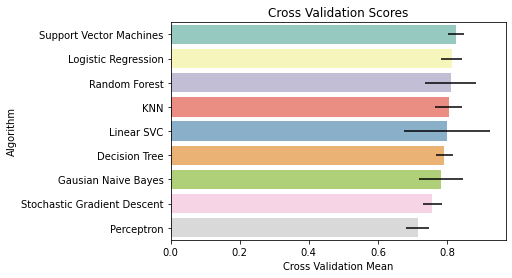

In [213]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')
plt.show()

**As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.**

### Hyperparameter tuning for SVM

In [214]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.821, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.676, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.719, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.777, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.826, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.826, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.770, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [215]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [216]:
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [217]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8305368289637952

In [219]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [220]:
len(Y_pred)

418

## 7. Preparing Data For Submission

In [221]:
example.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [222]:
example.shape

(418, 2)

In [223]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

PassengerId  Survived
891          892         0
892          893         1
893          894         0
894          895         0
895          896         1

In [224]:
submit.to_csv("~/Data Science/titanic_final/submit.csv", index = False)